In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

In [2]:
def latexFont(size= 15, labelsize=18, titlesize=20, ticklabelssize=15, legendsize = 18):
    plt.rcParams.update({
        "text.usetex": True})
    plt.rcParams["text.latex.preamble"].join([
        r"\usepackage{underscore}"
    ])
    plt.rcParams["font.family"] = 'STIXGeneral'
    plt.rc('font', size=size)          # controls default text sizes
    plt.rc('axes', titlesize=titlesize)     # fontsize of the axes title
    plt.rc('axes', labelsize=labelsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=ticklabelssize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=ticklabelssize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=legendsize)    # legend fontsize
    plt.rc('figure', titlesize=titlesize)  # fontsize of the figure title

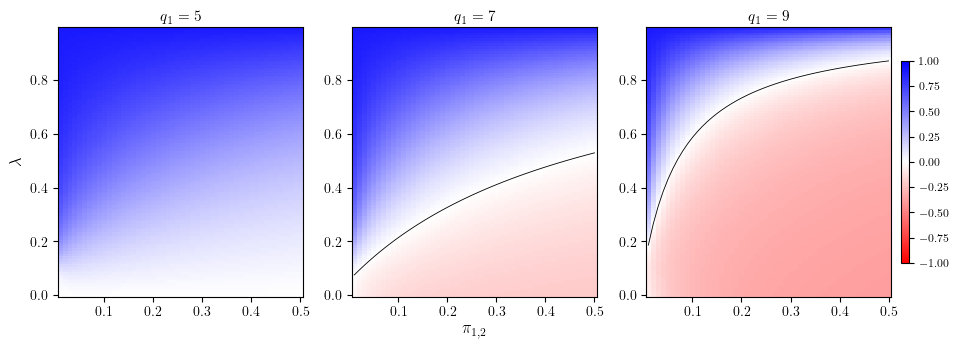

In [3]:
latexFont(titlesize=11, ticklabelssize=10, labelsize=12)
fig, ax = plt.subplots(1,3,figsize=(12.8,3.5))
q1s, q2 = [5,7,9], 10
x = 2
maxQ = 1 
for i,q1 in enumerate(q1s):
    fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
    Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
    #maxQ = abs(Qmesh).max()
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest')
    if i == 2:
        cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.01)
        cb.ax.tick_params(labelsize=8)
    if i > 0:
        tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
        tline = tline.query('pi >= 0.01')
        ax[i].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.6)
    ax[i].set_title(rf'$q_1 = {q1}$', pad=5)
ax[1].set_xlabel(r'$\pi_{1,2}$')
ax[0].set_ylabel(r'$\lambda$')
#fig.tight_layout()
fig.savefig(f'stateSpace_sym_q1_multiplot_q2_{q2}_f2_{int(x)}f1.pdf')

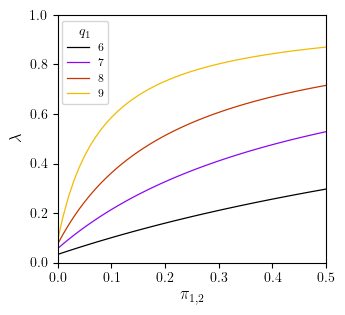

In [4]:
latexFont(ticklabelssize=10, labelsize=12, legendsize=8)
fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
q1s, q2 = [6,7,8,9], 10
colors = plt.cm.gnuplot(np.linspace(0,0.9,len(q1s)))
x = 2
for q1,c in zip(q1s, colors):
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi'], tline['lambda'], color=c, lw=0.9, label=f'{q1}')
ax.set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda$', xlim=(0,0.5), ylim=(0,1)) 
fig.tight_layout()
fig.legend(title=r'$q_1$', title_fontsize=10, loc=(0.18,0.67))
fig.savefig(f'tlines_sym_q2_{q2}_f2_2f1_paper.pdf')

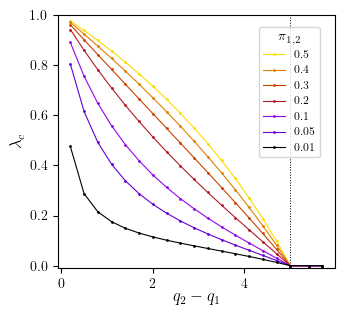

In [5]:
latexFont(ticklabelssize=10, labelsize=12, legendsize=8)
fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
pis = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
colors = list(plt.cm.gnuplot(np.linspace(0,0.95,len(pis))))
x = 2
q1s, q2 = [4.3,4.6]+[i/10 for i in range(50,100,3)], 10.0 
deltas = [q2-q1 for q1 in q1s]
pis.reverse(), colors.reverse()
for pi,c in zip(pis, colors):
    lambdas = []
    for q1 in q1s:
        tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv')
        lamb = float(tline.query('pi == @pi')['lambda'].iloc[0])
        if np.isnan(lamb):
            lambdas.append(0)
        else:
            lambdas.append(lamb)
    ax.plot(deltas, lambdas, label=f'{pi}', color=c, marker='.', lw=0.8, markersize=2)
ax.set(xlabel=r'$q_2 - q_1$', ylabel=r'$\lambda_c$', ylim=(-0.01,1))
ax.set_xlabel(r'$q_2 - q_1$', labelpad = 0.0)
ax.axvline(5, ls=':', color='xkcd:black', lw=0.7)
fig.tight_layout()
#fig.legend(title=r'$\pi_{1,2}$', title_fontsize=10, ncols=2, loc=(0.575, 0.65)) # , ncols=1, loc=(0.75, 0.5)
fig.legend(title=r'$\pi_{1,2}$', title_fontsize=10, ncols=1, loc=(0.75, 0.5)) # , ncols=1, loc=(0.75, 0.5)
#fig.savefig(f'tlines_sym_q2_{q2}_f2_2f1_paper.pdf')

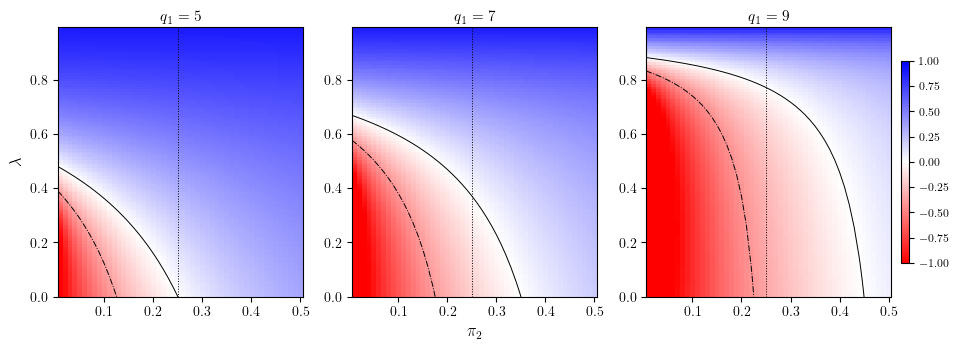

In [6]:
latexFont(titlesize=11, ticklabelssize=10, labelsize=12)
fig, ax = plt.subplots(1,3,figsize=(12.8,3.5))
q1s, q2 = [5,7,9], 10
pi1 = 0.25
x = 2
maxQ = 1 
for i,q1 in enumerate(q1s):
    fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
    Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest')
    if i == 2:
        cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.01)
        cb.ax.tick_params(labelsize=8)
    for x,ls in zip([1, 2], ['-.', '-']):
        tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
        tline = tline.query('pi2 >= 0.005')
        tline = tline.rename(columns={'lambda':'l'})
        i_last_pi2 = tline.query('l != l').iloc[0].name
        tline.at[i_last_pi2, 'l'] = 0.0
        ax[i].plot(tline['pi2'], tline['l'], color='xkcd:black', lw=0.7, ls=ls)
    ax[i].set_title(rf'$q_1 = {q1}$', pad=5)
    # vertical line to show the value of pi1:
    ax[i].axvline(pi1, ls=':', color='xkcd:black', lw=0.7)
    ax[i].set_ylim(0,None)    
ax[1].set_xlabel('$\pi_2$')
ax[0].set_ylabel('$\lambda$')
#fig.tight_layout()
fig.savefig(f'stateSpace_asym_fixPi1_pi1_{pi1}_q1_multiplot_q2_{q2}_f2_{int(x)}f1.pdf')

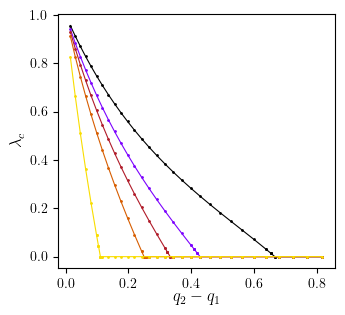

In [7]:
from plot_Tlines_asym import lambda_threshold_line
fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
latexFont(ticklabelssize=10, labelsize=12, legendsize=8)
pi1, pi2s = 0.25, [0.1, 0.2, 0.25, 0.3, 0.4]
colors = plt.cm.gnuplot(np.linspace(0,0.95,len(pi2s)))
q1s, q2 = [i/10 for i in range(10,100,3)], 10.0
#deltas = [q2-q1 for q1 in q1s]
for pi2, c in zip(pi2s, colors):
    deltas, lambdas, q1s_def = lambda_threshold_line(q1s, q2, pi1, pi2, 2)
    #deltas = [q2-q1 for q1 in q1s_def]
    ax.plot(deltas, lambdas, label=f'{pi2}', color=c, marker='.', lw=0.8, markersize=2)
ax.set_ylabel(r'$\lambda_c$')
ax.set_xlabel(r'$q_2 - q_1$', labelpad=0.0)
fig.tight_layout()